<a href="https://colab.research.google.com/github/Jandsy/ml_finance_imperial/blob/main/Programming_Sessions/Programming_session_5/Programming_Session_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Machine Learning and Finance </center>**


## <center> Programming Session 5 - Introduction to Sequence Models  - </center>



**Introduction:**

This session aims to explore two fundamental aspects of sequence modeling: a Numpy implementation of a standard Recurrent Neural Network (RNN) and the classification of MNIST digits using Long Short-Term Memory (LSTM) networks.

**Challenge:**

The primary challenge involves grasping the intricacies of sequence modeling techniques, understanding their implementation from scratch, and then applying them to a real-world dataset like MNIST for accurate digit classification. For the Numpy-based RNN, the challenge lies in comprehensively implementing the core functionality of RNNs using only Numpy operations. Meanwhile, for the LSTM-based MNIST classification, the challenge is to understand the complexities of LSTM cells and effectively utilize them to classify handwritten digits.

**Dataset Overview:**

The MNIST dataset, a classic benchmark dataset, consists of 28x28 grayscale images of handwritten digits ranging from 0 to 9. Each image is accompanied by a corresponding label indicating the digit it represents. This dataset serves as an ideal starting point for experimenting with various sequence modeling techniques.

**Objectives:**

1. **Numpy Implementation of Standard RNN:**
   - Understand the architecture and functioning of standard RNNs.
   - Implement a basic RNN using Numpy, focusing on forward propagation.

2. **MNIST Classification Using LSTM:**
   - Explore the concept of Long Short-Term Memory (LSTM) networks.
   - Train and evaluate the LSTM model on the MNIST dataset for accurate digit classification.


# 1. Numpy implementation of a standard RNN

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1vXVUvFIFDxYo_sdil2QPJWSCwXwZj27f"></center>

In [2]:
# Import basic libraries
import matplotlib.pyplot as plt # for plotting
import numpy as np # for manipulating arrays
import tensorflow as tf # for creating Neural Networks, we will use it to load data
plt.style.use('dark_background') # to adapt the colors to a dark background
from IPython.display import Image # for showing graphs from the lectures

We consider the following hyperparameters:

In [24]:
N = 1000
T = 100
D = 50
d = 20

---
<font color=green>Q1:</font>
<br><font color='green'>
Generate some random data of shape $(N, T, D)$ in 'data' variable.
</font>

---

(1000, 100, 50)


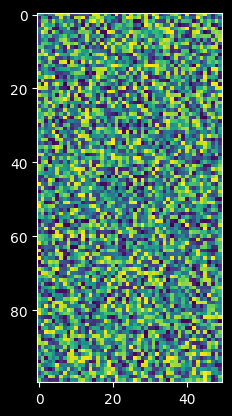

---
<font color=green>Q2:</font>
<br><font color='green'>
Generate some random weights $W_{hh}, W_{xh}, b_h$
</font>

---

---
<font color=green>Q3:</font>
<br><font color='green'>
Produce the output tensor with a shape of \((N, T, d)\) by generating the sequence \(h_1, \dots, h_T\) corresponding to each sequence \(x_1, \dots, x_T\):
1.   Initialize the Output Tensor : Create a tensor `H` with shape $(N, T, d)$ filled with zeros.
2.  Prepare for Iteration:
   - Loop through each of the $N$ samples.

3. Process Each Sample:
   - For each sample $i$, extract the sequence $X$ consisting of $T$ vectors of size $D$.
   - Initialize the hidden state $h_{t-1}$ with zeros of shape $(d,)$.
   - Create an empty list to store the generated hidden states $h_1, \dots, h_T$.

4. Generate Sequence of Hidden States:
   - For each element $x_t$ in the sequence $X$:
     - Compute the hidden state $h_t$ using the formula $h_t = \tanh(W_{xh}^T x_t + W_{hh}^T h_{t-1} + b_h)$.
     - Append $h_t$ to the list of outputs.
     - Update $h_{t-1}$ to the newly computed $h_t$.

5. Store the Sequence in the Output Tensor:
   - Assign the list of hidden states to the corresponding slice of the output tensor $H[i]$.


---

(100, 20)

---
<font color=green>Q4:</font>
<br><font color='green'>
Plot the shape of the output:
</font>

---

(1000, 100, 20)

# 2. MNIST Classification using LSTMs

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1KNpBc60u1QCopXygOff0tLkQNkyXuSmr"></center>

We aim to employ the LSTM layer for classifying the MNIST dataset, which consists of images shaped as $(60000, 28, 28)$. Each sample represents an image with dimensions $(28, 28)$. Viewing each image as a sequence, we can interpret it as having a length of $T = 28,$ with each element having a dimension of $D = 28$.

## 2.1 Loading the MNIST dataset

---
<font color=green>Q5:</font>
<br><font color='green'>
Retrieve the MNIST dataset by utilizing the `tf.keras.datasets.mnist.load_data`function.
</font>

---

11490434/11490434 [==============================] - 0s 0us/step


---
<font color=green>Q6:</font>
<br><font color='green'>
Print the shape of the training data.
</font>

---

(60000, 28, 28)


---
<font color=green>Q7:</font>
<br><font color='green'>
Normalize the feature train and test data by dividing each pixel element by 255.
</font>

---

---
<font color=green>Q8:</font>
<br><font color='green'>
The targets represent categories ranging from 0 to 9. To encode them into a tensor of shape $(N, 10)$, utilize the to_categorical function from `tensorflow.keras.utils` for one-hot encoding.
</font>

---

(60000, 10)

---
<font color=green>Q9:</font>
<br><font color='green'>
Build the specified model and train it using gradient descent optimization. Use model.compile() with 'ADAM' and model.fit() with 20% of validation split. </font>

---

<center><img width=“500" src = "https://drive.google.com/uc?export=view&id=1zCyhgITfxptmBzUDQ7-TPKsKugVyjtat"></center>

In [12]:
# Set hyperparameters
T = X_train.shape[1]
D = X_train.shape[2]
d = 32
M = 64
N_epochs = 10

In [13]:
# Import Modules
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                7808      
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 8138 (31.79 KB)
Trainable params: 8138 (31.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
657/657 [==============================] - 12s 16ms/step - loss: 1.1997 - accuracy: 0.5978 - val_loss: 0.7446 - val_accuracy: 0.7467
Epoch 2/10
657/657 [==============================] - 13s 20ms/step - loss: 0.6635 - accuracy: 0.7783 - val_loss: 0.5788 - val_accuracy: 0.8008
Epoch 3/10
657/657 [==============================] - 12s 18ms/step - loss: 0.5465 - accuracy: 0.8174 - val_loss: 0.5168 - val_accuracy: 0.8246
Epoch 4/10
657/657 [==============================] - 15s 23ms/step - loss: 0.4921 - accuracy: 0.8367 - val_loss: 0.4816 - val_accuracy: 0.8347
Epoch 5/10
657/657 [==============================] - 10s 16ms/step - loss: 0.4580 - accuracy: 0.8461 - val_loss: 0.4542 - val_accuracy: 0.8446
Epoch 6/10
657/657 [==============================] - 9s 13ms/step - loss: 0.4352 - accuracy: 0.8515 - val_loss: 0.4319 - val_accuracy: 0.8503
Epoch 7/10
657/657 [==============================] - 10s 15ms/step - loss: 0.4118 - accuracy: 0.8613 - val_loss: 0.4138 - val_accuracy: 

---
<font color=green>Q10:</font>
<br><font color='green'>
Visualize the training and validation loss, as well as the training and validation accuracy, through plots.
</font>

---

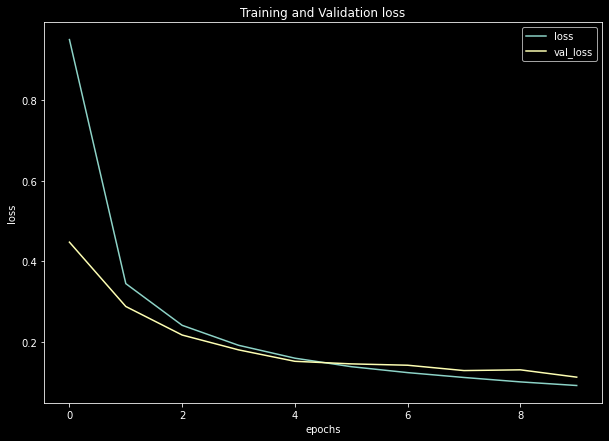

In [ ]:
# Plot the training loss and the validation loss


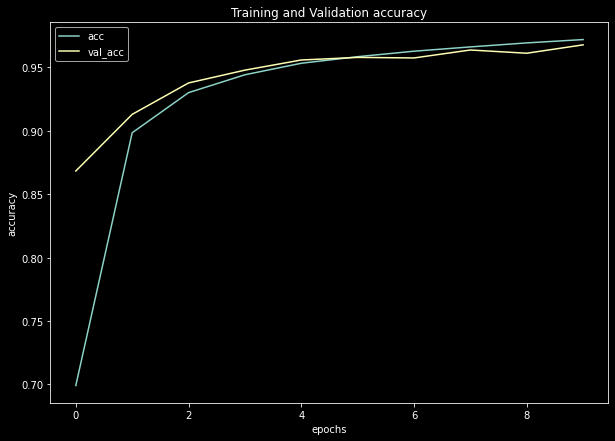

In [ ]:
# Plot the training accuracy and the validation accuracy


# Wrap-up


In this coding session, we've gained insights into the following:

* Implementing the RNN layer from scratch using Numpy, facilitating a deeper understanding of data transformations.
* Conducting a classification task on data with dimensions (N, T, D) by leveraging LSTM networks.

